In [1]:
import sys
sys.path.append("../")
sys.path.append("../deepYeast/")
sys.path.append("../deepYeast/deeplab/")
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cellmating.mating import Mating
from cellmating.utils import file_traverse, dump_to_pkl
from cellmating.io import imread, imsave
from cellmating.mating import Mating
from script_wlli.for_check_result_utils import draw_subgraph

In [2]:
from cellmating.tracking._ioutrack import Tracker
%load_ext autoreload
%autoreload 2

In [4]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  190


In [5]:
file_name = file_list[149]
image = imread(file_name)
file_name

'/media/wlli/T7/data/mating_all/20220903_YAV2104xYAV2105_003/selected/YAV2104xYAV2105_005_19_rigid_003011.tif'

In [6]:
%%time
trace = Tracker(image[:, -2,], threshold=0.7)
_ = trace()
traced_image = trace.to_image()

frame= 1 [23, 31] [23, 31]
frame= 2 [23] [22]
frame= 3 [31] [31]
frame= 4 [] []
frame= 5 [31] [31]
frame= 6 [] []
frame= 7 [31] [30]
frame= 8 [] []
frame= 9 [] []
divison: [[0 0 1]]
frame= 10 [] []
frame= 11 [31] [32]
frame= 12 [] []
divison: [[0 0 1]]
frame= 13 [] []
frame= 14 [0] [0]
frame= 15 [] []
frame= 16 [23] [24]
frame= 17 [31] [33]
frame= 18 [31] [33]
divison: [[0 0 1]]
frame= 19 [] []
frame= 20 [] []
frame= 21 [31] [34]
frame= 22 [] []
frame= 23 [] []
frame= 24 [0] [0]
frame= 25 [] []
divison: [[0 0 1]]
frame= 26 [] []
frame= 27 [] []
divison: [[0 0 1]]
frame= 28 [] []
frame= 29 [23] [24]
frame= 30 [0] [0]
frame= 31 [0, 31] [0, 36]
frame= 32 [0, 31] [0, 35]
frame= 33 [] []
divison: [[0 0 2]]
frame= 34 [17] [18]
frame= 35 [] []
frame= 36 [] []
frame= 37 [] []
frame= 38 [] []
frame= 39 [0, 31] [0, 37]
divison: [[0 0 1]]
frame= 40 [] []
frame= 41 [31] [38]
frame= 42 [23] [26]
frame= 43 [23, 31] [26, 38]
frame= 44 [0, 23] [0, 25]
frame= 45 [23] [27]
frame= 46 [23] [27]
divison: [

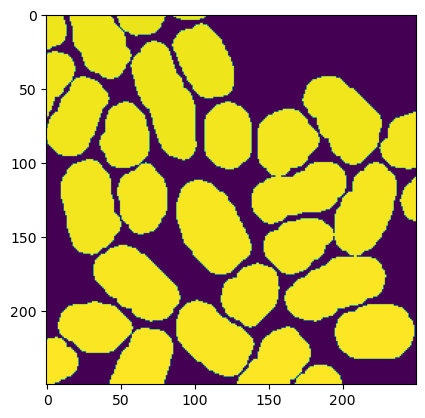

In [9]:
plt.imshow(traced_image[1])

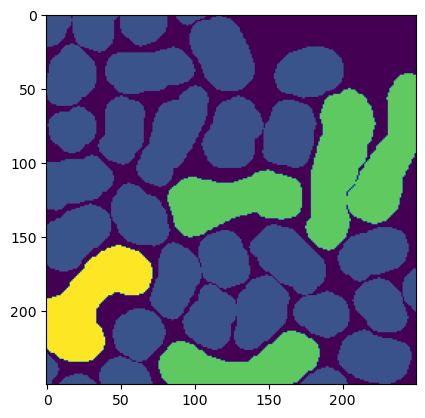

In [10]:
plt.imshow(traced_image[-1])

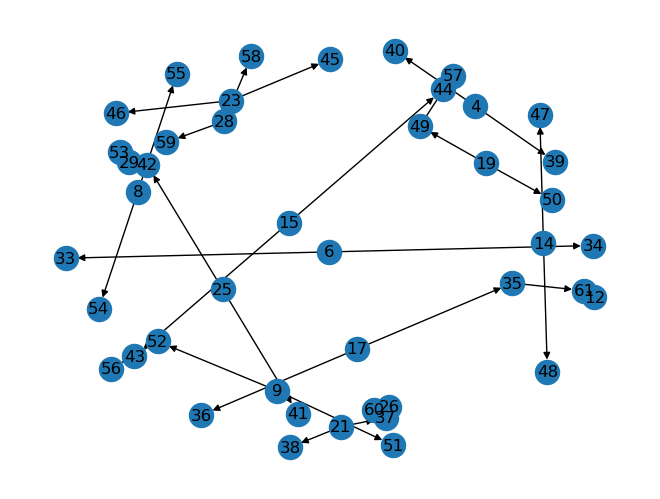

In [11]:
nx.draw(trace.network, with_labels=True)

In [44]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [45]:
key = int(file_name.split("_")[-1][:-4])
key = np.unique(tracked[-1,-1][tracked[-1,-2] == key])[0]%1000
c_mating = Mating(image=tracked, cells=trace.trackers, center=key, g=trace.network)

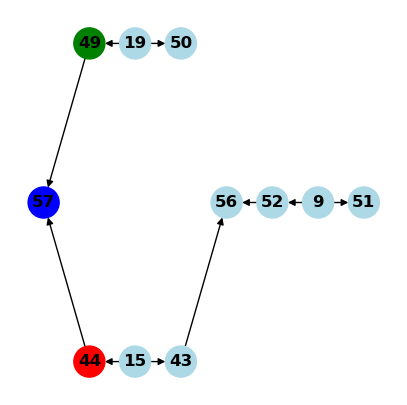

In [46]:
draw_subgraph(trace.network, key, c_mating.p, c_mating.m)
# plt.savefig("./figs_for_check_data/"+os.path.basename(file_name)[:-4]+"_net.png")

In [22]:
imsave("./test_trace_image.tif", traced_image, imagej=True)

In [9]:
imsave("./test_seg_image.tif", image[:, -2,], imagej=True)

In [68]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [47]:
save_name = file_name
imsave(save_name, tracked, imagej=True)
dump_to_pkl(trace.network, save_name[:-4]+".network")
dump_to_pkl(trace.trackers, save_name[:-4]+".tracker")

In [48]:
tracked.shape

(241, 5, 250, 250)

In [34]:
data = np.array([[0,1,2,],[3,4,5],[6,7,8]])

In [78]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [86]:
5 in data[:, 0:2]

False

In [80]:
data.sum(1)

array([ 3, 12, 21])